In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#Imdb dataset
imdb_title_basics = pd.read_csv('data/title.basics.csv')
imdb_title_akas = pd.read_csv('data/title.akas.csv')
imdb_title_crew = pd.read_csv('data/title.crew.csv')
imdb_title_principals = pd.read_csv('data/title.principals.csv')
imdb_name_basics = pd.read_csv('data/name.basics.csv')
imdb_title_ratings = pd.read_csv('data/title.ratings.csv')
#Rotten tomato dataset
rt_movie_info = pd.read_csv('data/rt.movie_info.tsv', delimiter="\t")
rt_reviews = pd.read_csv('data/rt.reviews.tsv', delimiter="\t", encoding='latin-1')
#Box office Mojo dataset
bom_movie_gross = pd.read_csv('data/bom.movie_gross.csv')
#The movies DB dataset
tmdb_movies = pd.read_csv('data/tmdb.movies.csv')
# The numbers dataset
tn_movies_budgets = pd.read_csv('data/tn.movie_budgets.csv')

In [ ]:
#Hoang's section pasted, clean up

In [9]:
#Import Data off different dataset. Taken from Kaggle called IMDB 5000 Movie Dataset.
metadeta = pd.read_csv('data/movie_metadata.csv')

In [10]:
#Examine what datamframe to see what it looks like
metadeta.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [11]:
#See if there are any null values and types
metadeta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [12]:
#Drop NA values
metadeta = metadeta[metadeta['gross'].notna()]

In [13]:
#Facebook launched around 2004, set dataframe to movie titles that were released after 2004
metadeta = metadeta[metadeta['title_year'] > 2004]

In [14]:
#Double checking to see minimum year
metadeta.min()

C:\Users\01aut\AppData\Local\Temp/ipykernel_17024/1380351631.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  metadeta.min()


director_name                                                  Aaron Schneider
num_critic_for_reviews                                                     1.0
duration                                                                  41.0
director_facebook_likes                                                    0.0
actor_3_facebook_likes                                                     0.0
actor_1_facebook_likes                                                     0.0
gross                                                                    162.0
genres                                                                  Action
movie_title                                               10 Cloverfield Lane 
num_voted_users                                                             22
cast_total_facebook_likes                                                    0
facenumber_in_poster                                                       0.0
movie_imdb_link              http://www.imdb.com/tit

In [15]:
metadeta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2156 entries, 0 to 5041
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      2154 non-null   object 
 1   director_name              2156 non-null   object 
 2   num_critic_for_reviews     2154 non-null   float64
 3   duration                   2154 non-null   float64
 4   director_facebook_likes    2156 non-null   float64
 5   actor_3_facebook_likes     2149 non-null   float64
 6   actor_2_name               2152 non-null   object 
 7   actor_1_facebook_likes     2154 non-null   float64
 8   gross                      2156 non-null   float64
 9   genres                     2156 non-null   object 
 10  actor_1_name               2154 non-null   object 
 11  movie_title                2156 non-null   object 
 12  num_voted_users            2156 non-null   int64  
 13  cast_total_facebook_likes  2156 non-null   int64

In [16]:
#checking correlation coefficient between the values
metadeta.corr()["gross"].sort_values()

facenumber_in_poster        -0.024948
aspect_ratio                 0.036908
budget                       0.099176
title_year                   0.119689
director_facebook_likes      0.174836
imdb_score                   0.197884
actor_1_facebook_likes       0.199291
actor_2_facebook_likes       0.299579
cast_total_facebook_likes    0.318170
duration                     0.324626
actor_3_facebook_likes       0.362785
movie_facebook_likes         0.455585
num_critic_for_reviews       0.557206
num_user_for_reviews         0.628843
num_voted_users              0.698520
gross                        1.000000
Name: gross, dtype: float64

In [17]:
#There are alot of categories of facebook likes, lets see what they looked like combined
metadeta['combined_likes_movie'] = metadeta['actor_2_facebook_likes'] + metadeta['actor_1_facebook_likes'] +  metadeta['actor_3_facebook_likes'] + metadeta['director_facebook_likes'] +  metadeta['movie_facebook_likes'] + metadeta['cast_total_facebook_likes'] 

In [18]:
#Lets check the correlation coefficient, we can see that when all facebook likes are combined it produces a strong correlation coefficient
metadeta.corr()["gross"].sort_values()

facenumber_in_poster        -0.024948
aspect_ratio                 0.036908
budget                       0.099176
title_year                   0.119689
director_facebook_likes      0.174836
imdb_score                   0.197884
actor_1_facebook_likes       0.199291
actor_2_facebook_likes       0.299579
cast_total_facebook_likes    0.318170
duration                     0.324626
actor_3_facebook_likes       0.362785
movie_facebook_likes         0.455585
combined_likes_movie         0.465892
num_critic_for_reviews       0.557206
num_user_for_reviews         0.628843
num_voted_users              0.698520
gross                        1.000000
Name: gross, dtype: float64

In [19]:
#Let's break up everything by Genre now, formatting has to be right
metadeta['genres'] = metadeta['genres'].map(lambda x : x.replace("|", " ")) 
metadeta['genres'] = metadeta['genres'].map(lambda x : x.split())

In [20]:
metadeta

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,combined_likes_movie
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,"[Action, Adventure, Fantasy, Sci-Fi]",...,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,40625.0
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,"[Action, Adventure, Fantasy]",...,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,94913.0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,"[Action, Adventure, Thriller]",...,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,108254.0
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,"[Action, Thriller]",...,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,365759.0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,"[Action, Adventure, Sci-Fi]",...,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,28150.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5021,Color,Jay Duplass,51.0,85.0,157.0,10.0,Katie Aselton,830.0,192467.0,"[Comedy, Drama, Romance]",...,English,USA,R,15000.0,2005.0,224.0,6.6,NaN,297,2582.0
5023,Color,Daryl Wein,22.0,88.0,38.0,211.0,Heather Burns,331.0,76382.0,[Romance],...,English,USA,NaN,15000.0,2009.0,212.0,6.2,2.35,324,2662.0
5034,Color,Neill Dela Llana,35.0,80.0,0.0,0.0,Edgar Tancangco,0.0,70071.0,[Thriller],...,English,Philippines,Not Rated,7000.0,2005.0,0.0,6.3,NaN,74,74.0
5037,Color,Edward Burns,14.0,95.0,0.0,133.0,Caitlin FitzGerald,296.0,4584.0,"[Comedy, Drama]",...,English,USA,Not Rated,9000.0,2011.0,205.0,6.4,NaN,413,1737.0


In [21]:
#Explode will let us split them up
metadeta = metadeta.explode('genres')

In [24]:
metadeta

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,combined_likes_movie
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action,...,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,40625.0
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Adventure,...,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,40625.0
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Fantasy,...,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,40625.0
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Sci-Fi,...,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,40625.0
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action,...,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,94913.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5037,Color,Edward Burns,14.0,95.0,0.0,133.0,Caitlin FitzGerald,296.0,4584.0,Comedy,...,English,USA,Not Rated,9000.0,2011.0,205.0,6.4,NaN,413,1737.0
5037,Color,Edward Burns,14.0,95.0,0.0,133.0,Caitlin FitzGerald,296.0,4584.0,Drama,...,English,USA,Not Rated,9000.0,2011.0,205.0,6.4,NaN,413,1737.0
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy,...,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660,5200.0
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Drama,...,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660,5200.0


In [26]:
#There are two seperate Music and Musical genre. They are similar enough to condense into one column.
metadeta['genres'] = metadeta['genres'].map(lambda x: "Musical" if x == "Music" else x)

In [27]:
#Setting up plot legend and labels for better data visualization
metadeta.rename(columns={'genres': 'Genres'}, inplace = True)
metadeta['gross_adjusted'] = metadeta['gross'] / 1000000
metadeta['combined_likes_movie_adjusted'] = metadeta['combined_likes_movie'] / 1000

C:\Users\01aut\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


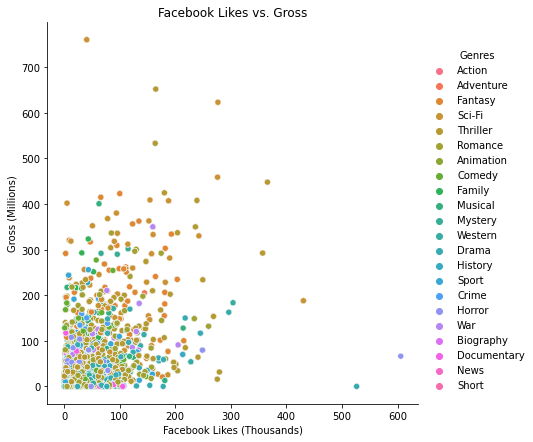

In [29]:
#Plotting with SNS by genre
sns.pairplot(x_vars= ['combined_likes_movie_adjusted'], y_vars=["gross_adjusted"], data= metadeta, 
hue="Genres", size=6)

plt.title('Facebook Likes vs. Gross')
plt.xlabel('Facebook Likes (Thousands)')
plt.ylabel('Gross (Millions)');



In [30]:
#Lets now only look at the 3 genres we are interested in
metadeta_top3 = metadeta[(metadeta['Genres'] == 'Horror') | (metadeta['Genres'] == 'Mystery') | (metadeta['Genres'] == 'Musical')]

C:\Users\01aut\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


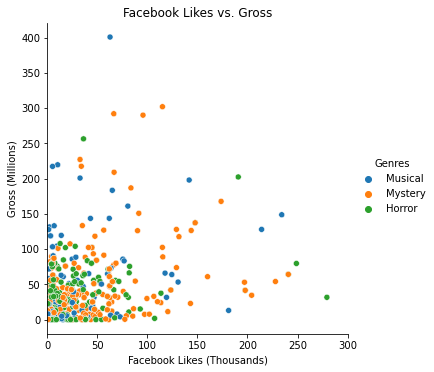

In [31]:
#Plotting the only 3 genres, limited x to 300 to get a good grasp without outliers
sns.pairplot(x_vars= ['combined_likes_movie_adjusted'], y_vars=["gross_adjusted"], data= metadeta_top3, 
hue="Genres", size=5)

plt.title('Facebook Likes vs. Gross')
plt.xlabel('Facebook Likes (Thousands)')
plt.ylabel('Gross (Millions)')
plt.xlim(0, 300);

In [32]:
#Checking the correlation between gross and combined likes movies under genres
metadeta.groupby('Genres')[["combined_likes_movie", "gross"]].corr()["gross"].loc[:,"combined_likes_movie"].sort_values()

Genres
Documentary    0.079296
Sport          0.205754
Horror         0.274817
Mystery        0.317863
Musical        0.321736
Animation      0.323789
Comedy         0.334132
Crime          0.431754
Romance        0.440537
Biography      0.463471
Drama          0.466650
Family         0.477682
Fantasy        0.487128
Action         0.487605
Adventure      0.526538
Thriller       0.536642
Sci-Fi         0.543116
History        0.629724
War            0.684955
Western        0.829149
News                NaN
Short               NaN
Name: gross, dtype: float64

In [33]:
#Checking the movie likes in each genre
metadeta.groupby('Genres').sum().loc[:,"combined_likes_movie"].sort_values( ascending = False)

Genres
Drama          42565102.0
Action         27662055.0
Thriller       26982409.0
Adventure      25829685.0
Comedy         24846521.0
Sci-Fi         16157498.0
Romance        16051586.0
Fantasy        14956100.0
Crime          14190906.0
Family          9894327.0
Mystery         8965901.0
Biography       6983713.0
Horror          6670355.0
Animation       4661824.0
Musical         3553761.0
History         3212747.0
War             2990686.0
Sport           2589418.0
Western         1553688.0
Documentary      570876.0
News              15318.0
Short                 0.0
Name: combined_likes_movie, dtype: float64